<h1> Visualize Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib) </h1>

Notebook Goals

* Learn the various ways to visualize decision trees
* Reinforce that there are many ways to accomplish a goal

In order to visualize decision trees, we need first need to fit a decision tree model using scikit-learn.

<h2> Import Libraries </h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

<h2> Load the Dataset </h2>
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h2>Train Test Split</h2>

![images](images/trainTestSplit.png)
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split. Image by [Michael Galarnyk](https://twitter.com/GalarnykMichael).

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

<h2>Decision trees for classification</h2>

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [4]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [5]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [6]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

Uses the information the model learned during the model training process

In [7]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

Predict for Multiple Observations (images) at Once

In [8]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

<h2> Measuring Model Performance </h2> 

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [9]:
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


<h2> How to Visualize Decision Trees using Matplotlib </h2>

As of scikit-learn version 21.0 (roughly May 2019), Decision Trees can now be plotted with matplotlib using scikit-learn's `tree.plot_tree` without relying on the dot library which is a relatively hard-to-install dependency. 

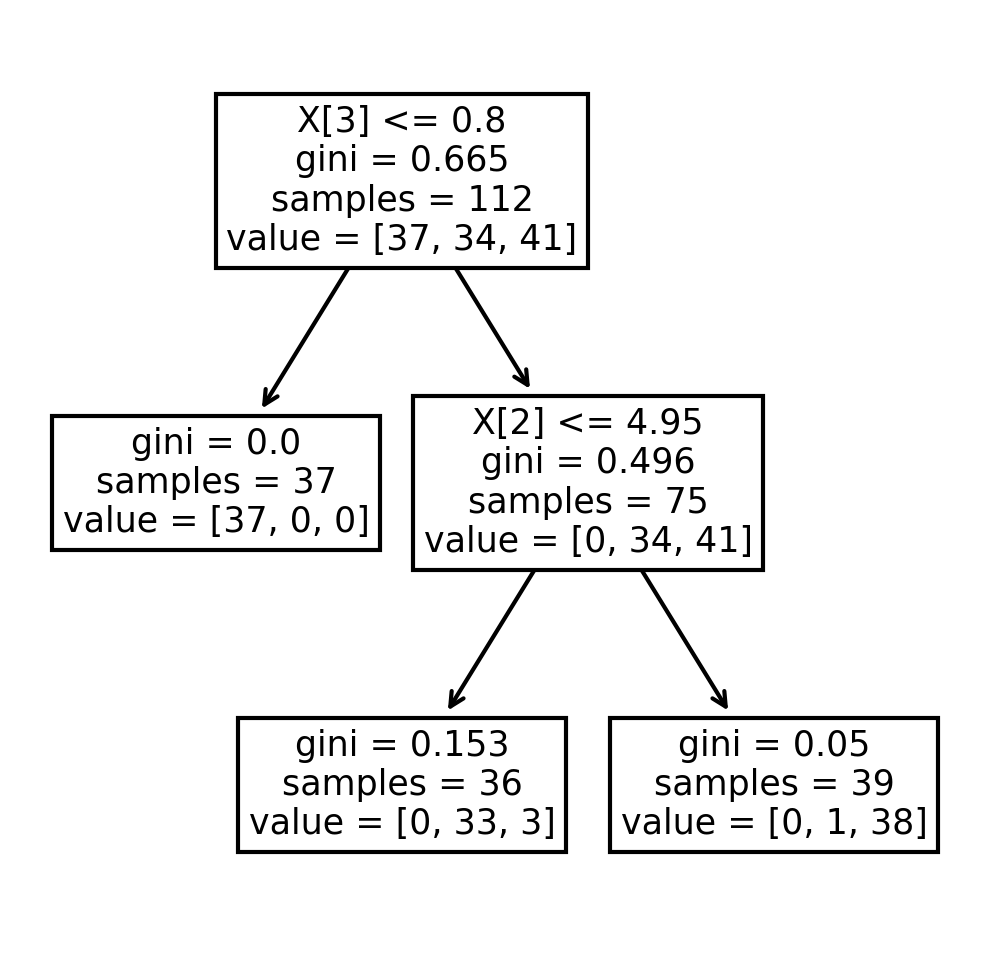

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);
fig.savefig('images/plottreedefault.png')

In [10]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

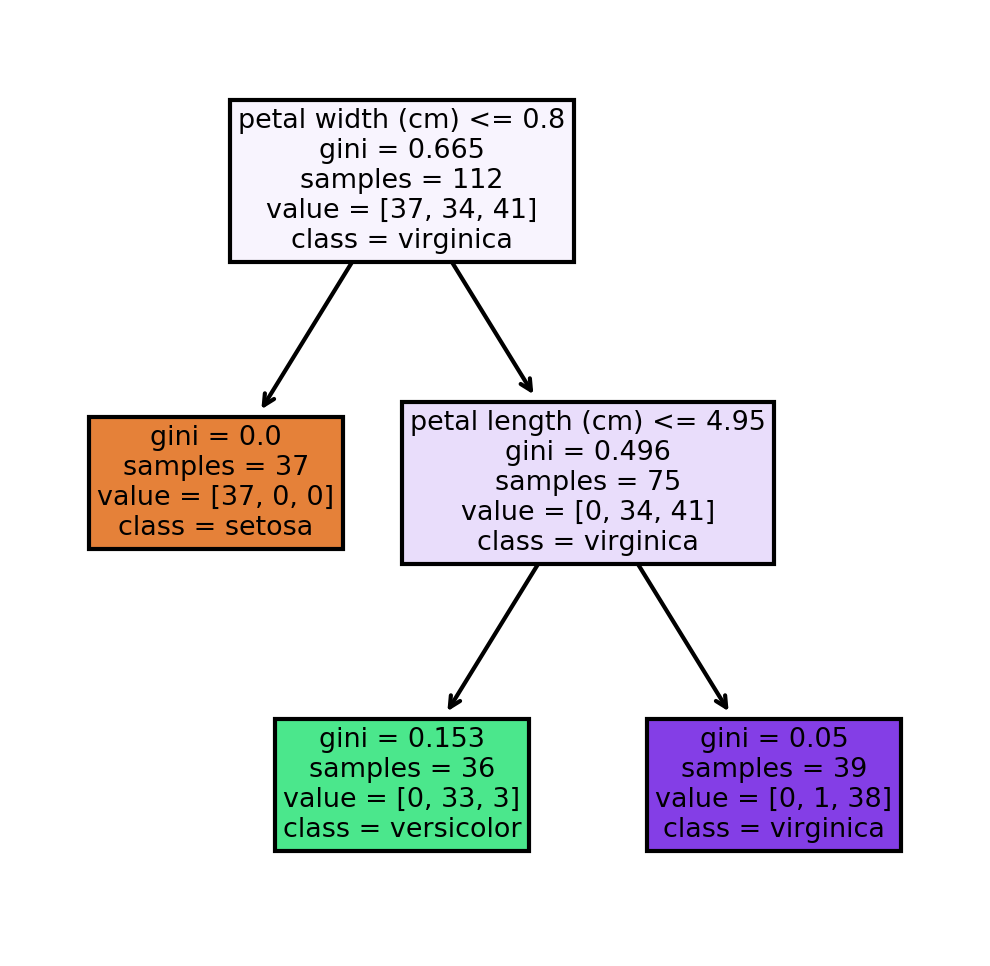

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('images/plottreefncn.png')

<h2> How to Visualize Decision Trees using Graphviz</h2>

![images](images/graphvizCTblog.png)
The image above is a Decision Tree I produced through Graphviz. Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks. In data science, one use of Graphviz is to visualize decision trees. I should note that the reason why I am going over Graphviz after covering Matplotlib is that getting this to work can be difficult. The first part of this process involves creating a dot file. A dot file is a Graphviz representation of a decision tree. The problem is that using Graphviz to convert the dot file into an image file (png, jpg, etc) can be difficult. There are a couple ways to do this including: installing python-graphviz though Anaconda, installing Graphviz through Homebrew (Mac only), installing Graphviz through executables (Windows only), and using an online converter on the content of your dot file to convert it into an image.
![images](images/dot2imagefile.png)

### Export your model to a dot file
The code below code will work on any operating system as python generates the dot file and exports it as a file named tree.dot.

In [12]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [13]:
# Ignore this cell as I am just rotating the decision tree output. 
"""
tree.export_graphviz(clf,
                     out_file="treeRotated.dot",
                     feature_names = fn, 
                     class_names=cn,
                     rotate = True,
                     filled = True)
"""

'\ntree.export_graphviz(clf,\n                     out_file="treeRotated.dot",\n                     feature_names = fn, \n                     class_names=cn,\n                     rotate = True,\n                     filled = True)\n'

### Installing and Using Graphviz
Converting the dot file into an image file (png, jpg, etc) typically requires installation of Graphviz which depends on your operating system and a host of other things. I highly recommend that if you get an error in the code below to see [a blog I wrote](https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc) and see how to install it on your operating system.

In [14]:
!dot -Tpng -Gdpi=300 tree.dot -o tree.png

In [15]:
#!dot -Tpng -Gdpi=300 treeRotated.dot -o treeRotated.png

## How to Visualize Individual Decision Trees from Bagged Trees or Random Forests

![images](images/BaggedTrees.png)

A weakness of decision trees is that they don't tend to have the best predictive accuracy. This is partially because of high variance, meaning that different splits in the training data can lead to very different trees.

The image above could be a diagram for Bagged Trees or Random Forests models which are ensemble methods. This means using multiple learning algorithms to obtain a better predictive performance than could be obtained from any of the constituent learning algorithms alone (many trees protect each other from their individual errors). How exactly Bagged Trees and Random Forests models work is a subject for another blog, but what is important to note is that for each both models we grow N trees where N is the number of decision trees a user specifies. Consequently after you fit a model, it would be nice to look at the individual decision trees that make up your model.

### Load the Dataset
The Breast Cancer Wisconsin (Diagnostic) Dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the dataset.

In [16]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Arrange Data into Features Matrix and Target Vector

In [17]:
X = df.loc[:, df.columns != 'target']

In [18]:
y = df.loc[:, 'target'].values

### Split the data into training and testing sets

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

### Random Forests in `scikit-learn` (with N = 100)

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [21]:
# This was already imported earlier in the notebook so commenting out
# from sklearn.ensemble import RandomForestClassifier

<b>Step 2:</b> Make an instance of the Model

In [22]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data. Model is learning the relationship between features and labels

In [23]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<b>Step 4:</b> Predict the labels of new data

Uses the information the model learned during the model training process

In [24]:
# Not doing this step in the tutorial
# class predictions (not predicted probabilities)
# predictions = rf.predict(X_test)

### Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [25]:
# In this dataset we have 357 benign and 212 malignant
score = rf.score(X_test, Y_test)
print(score)

0.972027972027972


In [26]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Visualizing your Estimators

You can now view all the individual trees from the fitted model.

In [27]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                   

In [28]:
# We have 100 estimators
print(len(rf.estimators_))

100


In [29]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=209652396, splitter='best')

You can now visualize individual trees.

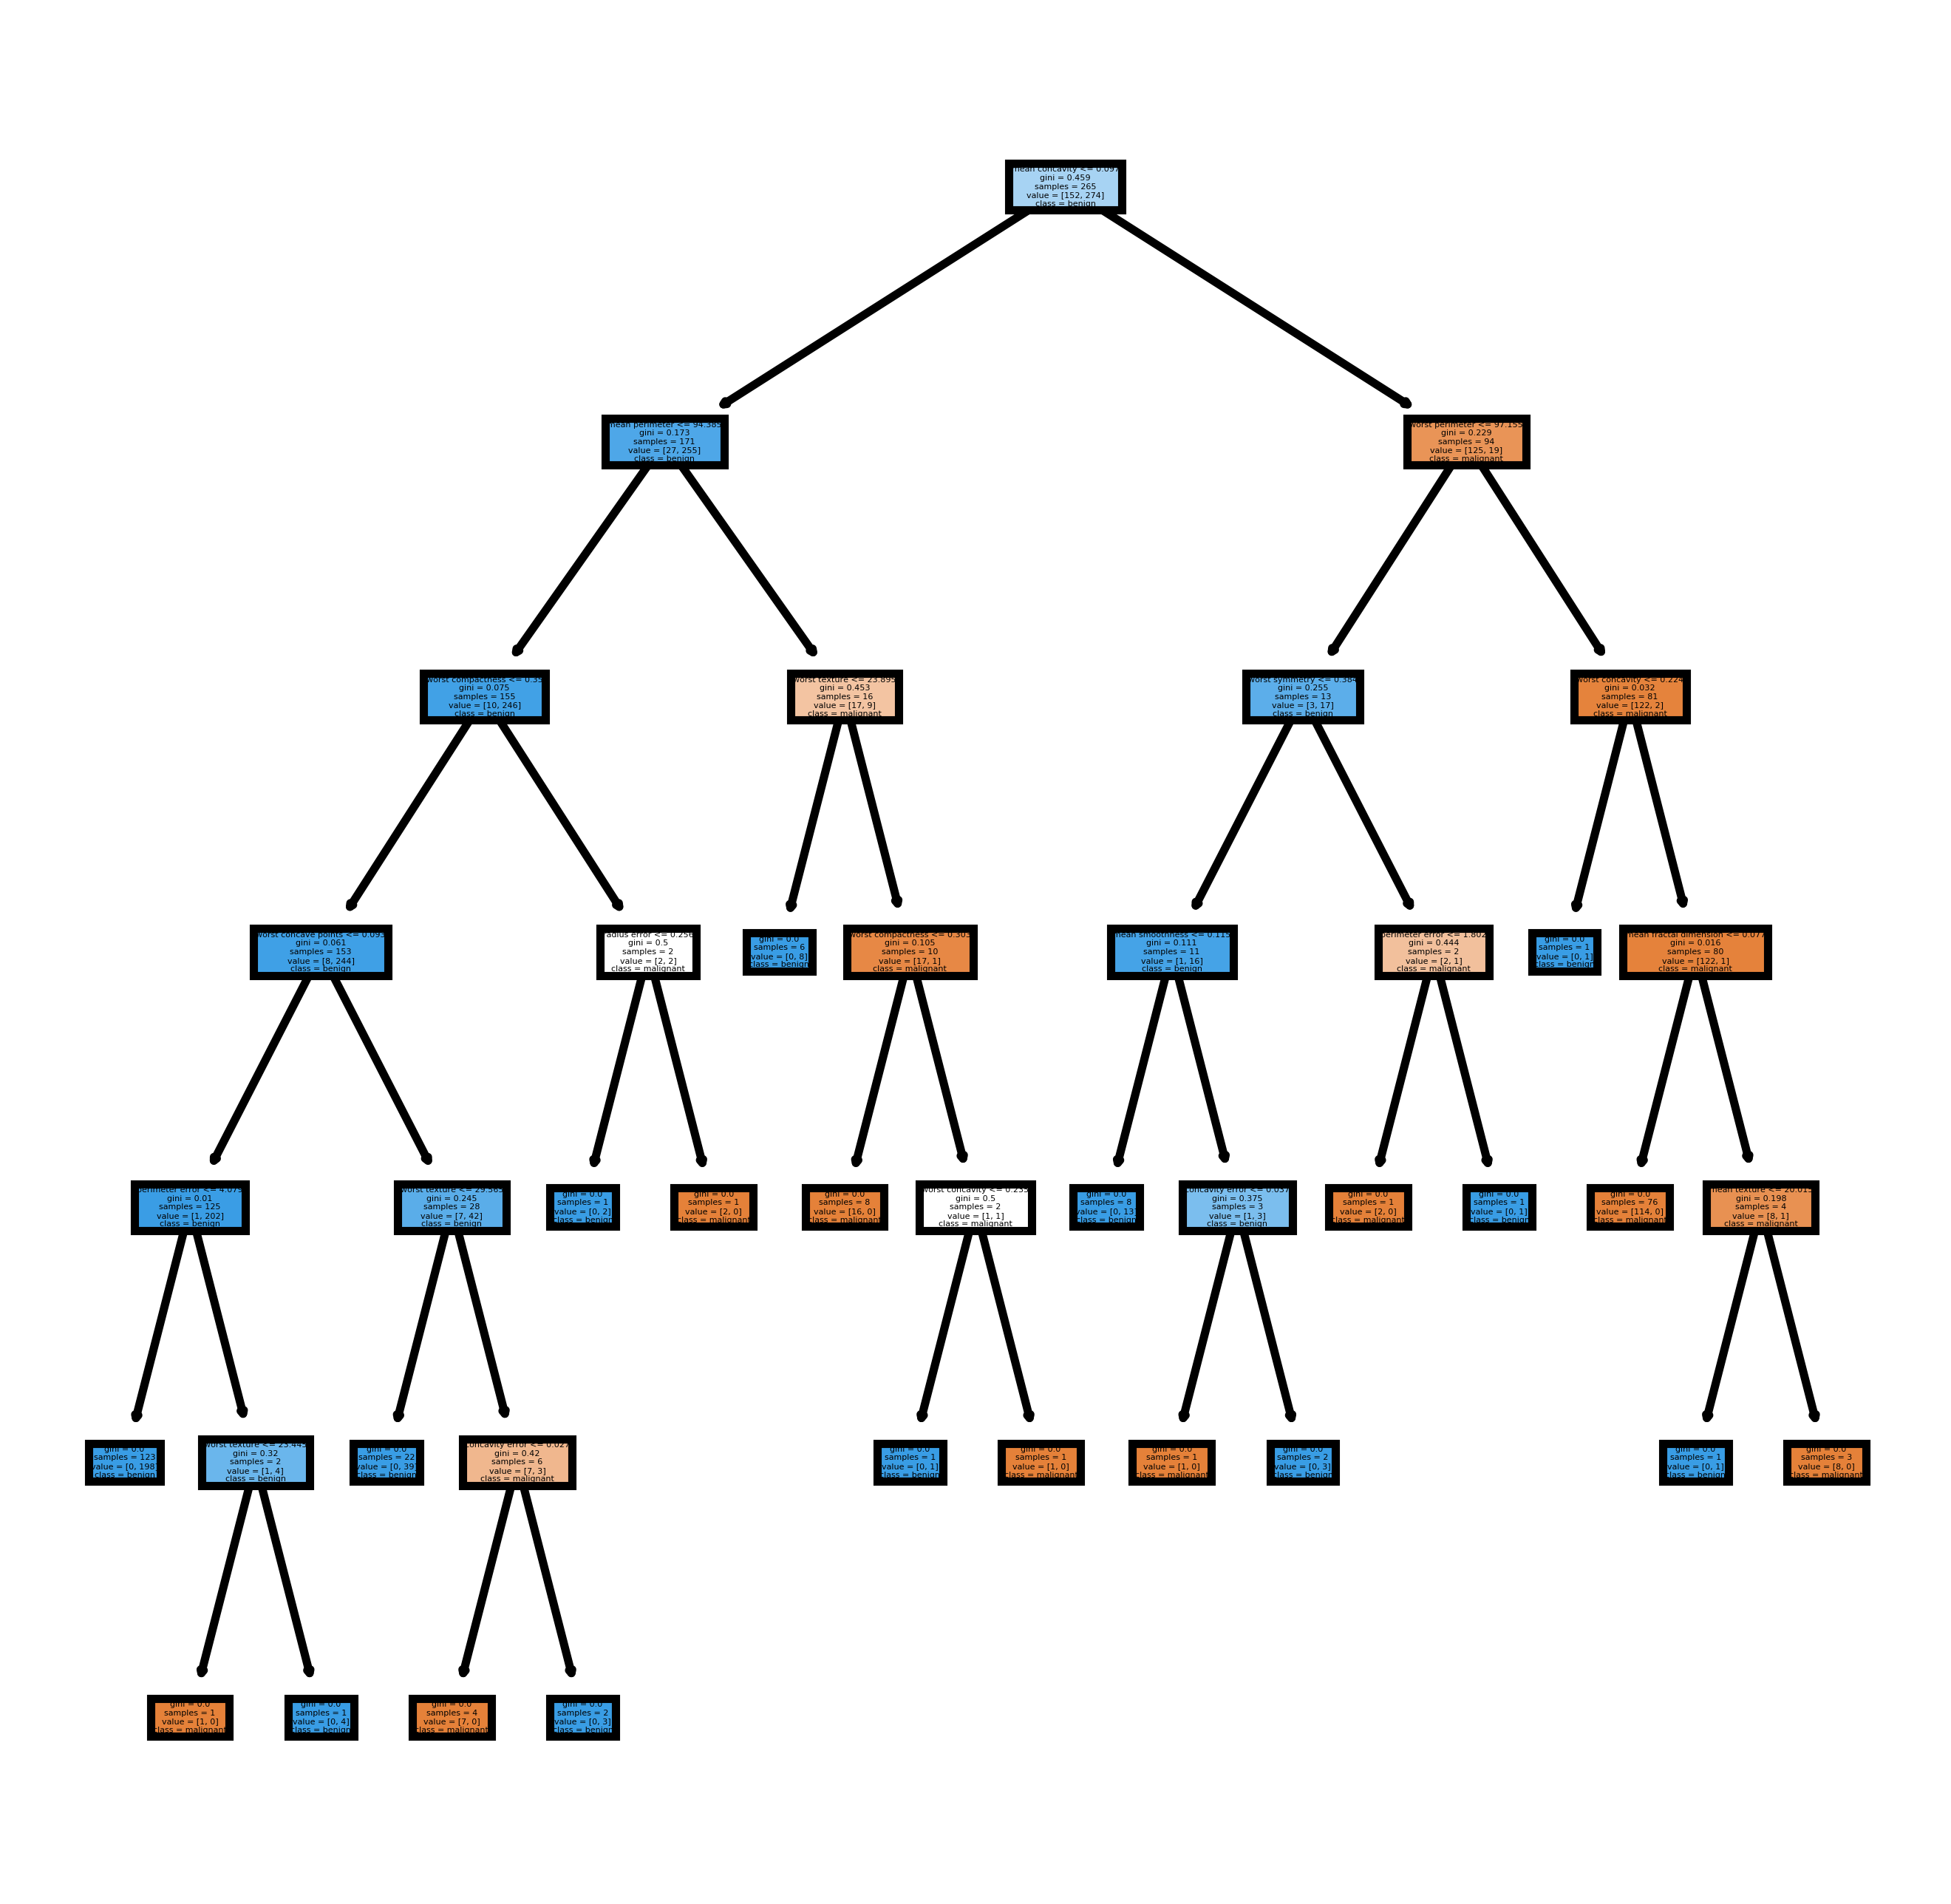

In [30]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

You can try to use Matplotlib subplots to visualize the first 5 decision trees. I personally don't prefer this method as I find it doesn't save the output very well (particularly as visualizing decision trees through Matplotlib is a relatively new feature) and it is even harder to read.

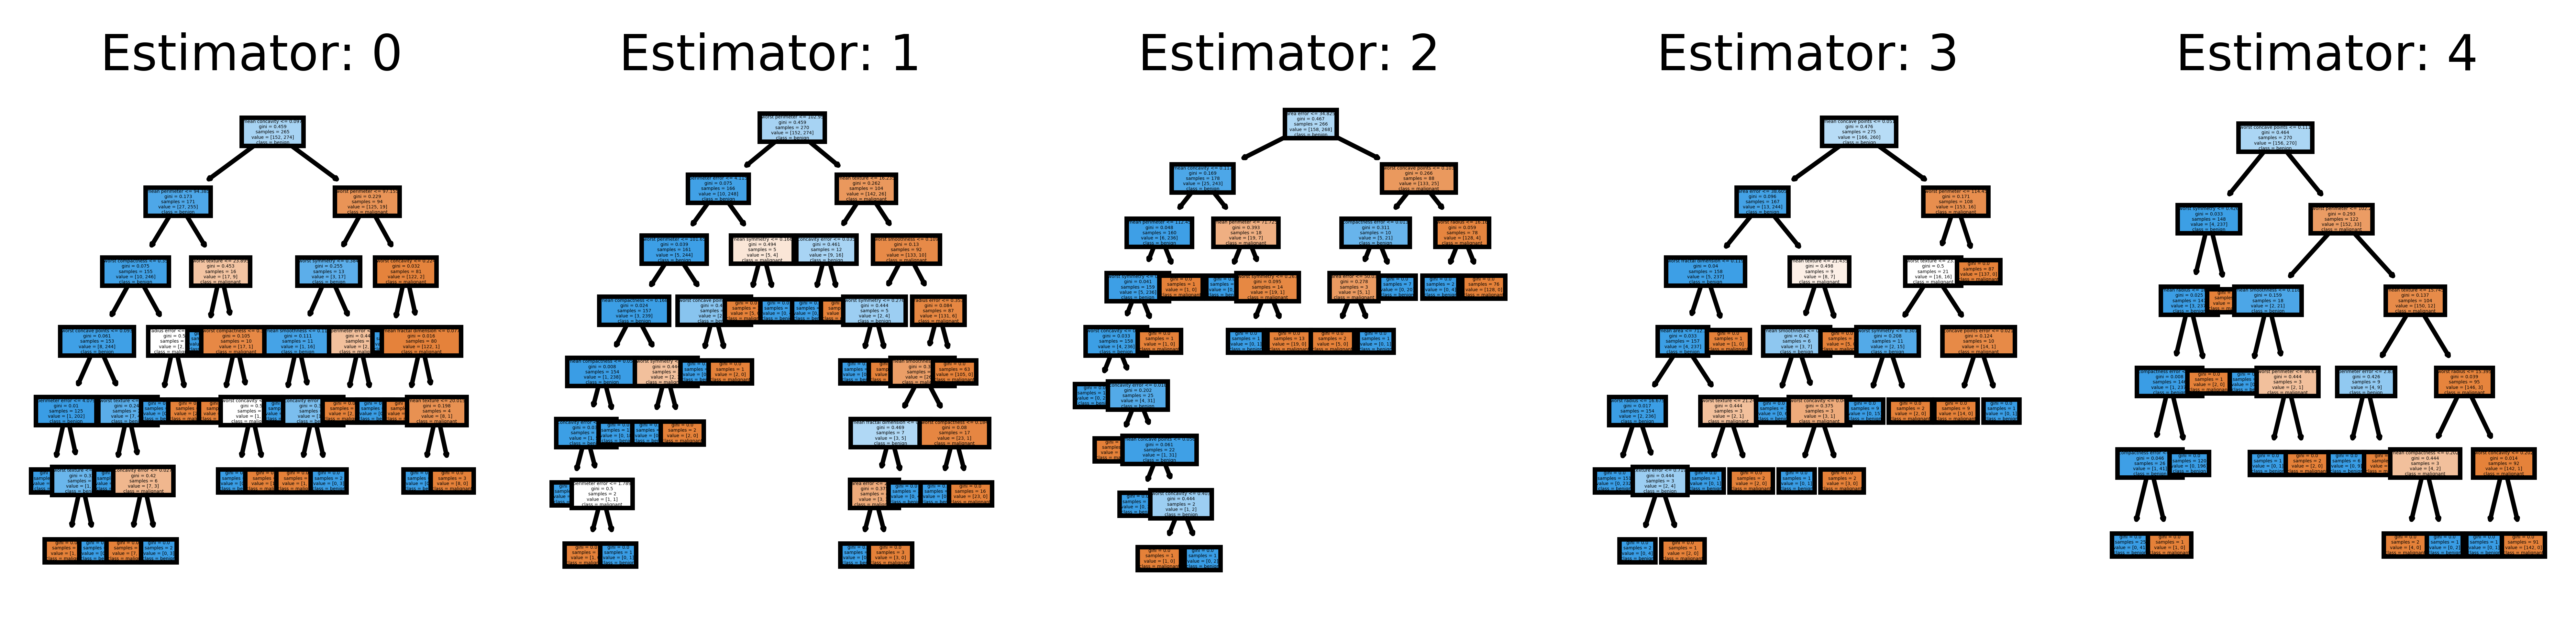

In [31]:
# This may not the best way to view each estimator as it is small 

fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=1000)

for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)


fig.savefig('rf_5trees.png')

### Create Images for each of the Decision Trees (estimators)

The output of this code is shown on an [unlisted youtube video](https://youtu.be/X8UeOrsUKQ4).

In [32]:
"""
# This code is just making the feature name text shorter
fn = []
for feature in data.feature_names: 
    parts = []
    for part in feature.split(): 
        parts.append(part.title())
    ''.join(parts)
    fn.append(''.join(parts))

cn=data.target_names

for index in range(0, len(rf.estimators_)):
    #plt.figure(figsize = (4,4), dpi = 300)
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True)
    
    importances = pd.DataFrame({'feature':fn,'importance':np.round(rf.estimators_[index].feature_importances_,2)})
    importances = importances.sort_values('importance',ascending=False)
    
    axes.set_title('Estimator: ' + str(index) + 
              '\n\'Most Important\' Feature:' + importances.iloc[0]['feature'] +
              '(' + str(importances.iloc[0]['importance']) +  ')', fontsize = 10.5)

    
    fig.savefig('../imagesanimation/' + 'initial' + str(index).zfill(4) + '.png')
    plt.close('all')
"""

"\n# This code is just making the feature name text shorter\nfn = []\nfor feature in data.feature_names: \n    parts = []\n    for part in feature.split(): \n        parts.append(part.title())\n    ''.join(parts)\n    fn.append(''.join(parts))\n\ncn=data.target_names\n\nfor index in range(0, len(rf.estimators_)):\n    #plt.figure(figsize = (4,4), dpi = 300)\n    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)\n    tree.plot_tree(rf.estimators_[index],\n                   feature_names = fn, \n                   class_names=cn,\n                   filled = True)\n    \n    importances = pd.DataFrame({'feature':fn,'importance':np.round(rf.estimators_[index].feature_importances_,2)})\n    importances = importances.sort_values('importance',ascending=False)\n    \n    axes.set_title('Estimator: ' + str(index) + \n              '\n'Most Important' Feature:' + importances.iloc[0]['feature'] +\n              '(' + str(importances.iloc[0]['importance']) +  ')', fontsi

I highly recommend that you DONT TRY AND DO THIS ON YOUR COMPUTER. It might slow down your computer a lot. This also assumes you have ffmpeg. For my mac, I did `brew install ffmpeg`. Here is an okay reference on installing it on windows (https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg)

In [ ]:
# !ffmpeg -framerate 1 -i '../imagesanimation/initial%04d.png' -c:v libx264 -r 30 -pix_fmt yuv420p '../imagesanimation/initial_002.mp4'